In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [6]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

# framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
framworks = ["mp-slice"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/input_short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

mean input_size
100       0.680
1000      4.055
10000    39.295
Name: runtime_external(s), dtype: float64


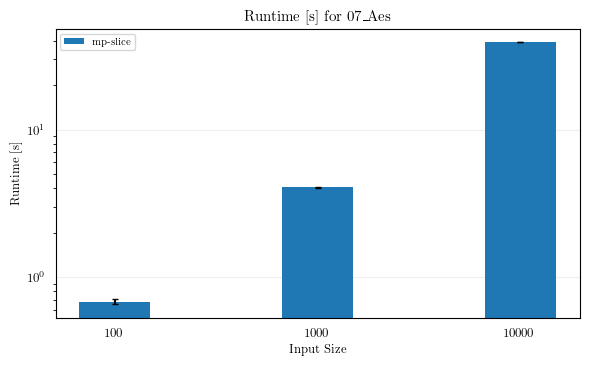

In [7]:
inputs,label=rf.get_input_deviation(data)
label = ["mp-slice"]

fig, ax = plt.subplots()
n_groups = len(inputs[0])
n_bars = len(inputs)

# Setting the bar width
width = 0.35

total_width = n_bars * width
offset = total_width / 2 - width / 2

# Setting the x locations for the groups
ind = np.arange(n_groups)

# Create bars
bar_list = []
for i, df in enumerate(inputs):
    bar_position = ind - offset + i * width
    bar_list.append(ax.bar(bar_position, df['mean'], width, yerr=df['std'] , label=f"mp-slice"))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_ylabel('Runtime [s]')
ax.set_xlabel('Input Size')
ax.set_title(f'Runtime [s] for {experiment}')
ax.set_xticks(ind)
ax.set_xticklabels((inputs[0]['input_size']))
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
ax.legend()
ax.figure.set_size_inches(5.91, 3.5)
plt.show()

mean input_size
100        40.0
1000      453.0
10000    2244.0
Name: peakRAM(MiB), dtype: float64


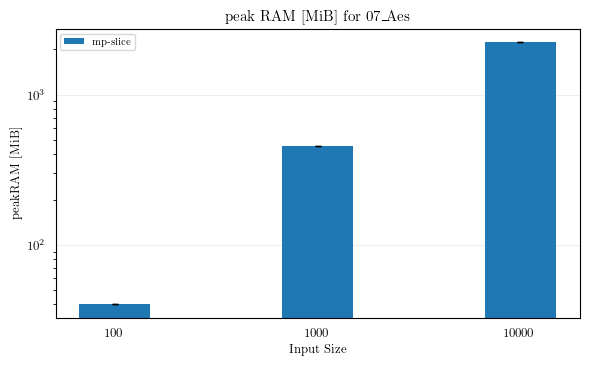

In [8]:
inputs,label=rf.get_input_deviation_ram(data)
label = ["mp-slice"]

fig, ax = plt.subplots()
n_groups = len(inputs[0])
n_bars = len(inputs)

# Setting the bar width
width = 0.35

total_width = n_bars * width
offset = total_width / 2 - width / 2

# Setting the x locations for the groups
ind = np.arange(n_groups)

# Create bars
bar_list = []
for i, df in enumerate(inputs):
    bar_position = ind - offset + i * width
    bar_list.append(ax.bar(bar_position, df['mean'], width, yerr=df['std'] , label=f"mp-slice"))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_ylabel('peakRAM [MiB]')
ax.set_xlabel('Input Size')
ax.set_title(f'peak RAM [MiB] for {experiment}')
ax.set_xticks(ind)
ax.set_xticklabels((inputs[0]['input_size']))
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
ax.legend()
ax.figure.set_size_inches(5.91, 3.5)
plt.show()